# Laboratorio 2 Machine Learning Avanzado - Red Neuronal LSTM

## Integrantes

- Sebastián Gacitúa
- Bastián Guzmán
- Jose Zamora
- Leandro Aroca
- Matthias Clein

## Librerías

In [333]:
!pip install scikit-image

In [334]:
import numpy as np
from skimage import io, color
from skimage.transform import resize
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Dropout, MaxPooling2D, Flatten, Dense, LSTM, Embedding, Bidirectional

import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, RobustScaler
from keras import models, optimizers, regularizers
from keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import SGD, Adam, RMSprop



## Imagenes

### Carga y lectura de imagenes

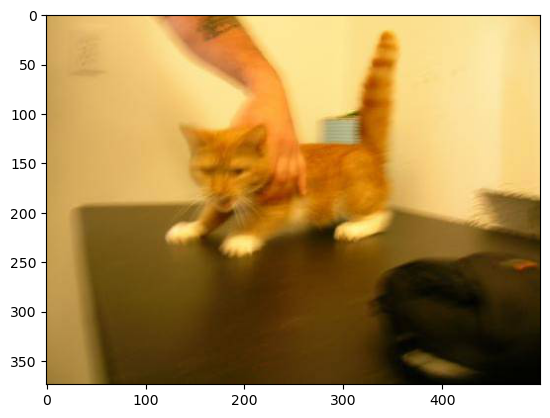

(374, 500, 3)


In [335]:
image = io.imread("./lab2_MLA_LSTM-main/train (1)/train/cat.0.jpg")
plt.imshow(image)
plt.show()
print(image.shape)
#image = io.imread("../data/dogs-vs-cats/train/cat.0.jpg")
#C:\Users\leand\Desktop\lab2_MLA_LSTM-main

In [336]:
def generate_data(num_images):
    images = []
    labels = []
    for i in range(0, num_images):
        path = "./lab2_MLA_LSTM-main/train (1)/train/cat.X.jpg"
        path = path.replace("X", str(i))
        image = io.imread(path)
        image = color.rgb2gray(image)
        image = resize(image, (200, 200), anti_aliasing = True)
        images.append(image)
        labels.append(0)

    for i in range(0, num_images):
        path = "./lab2_MLA_LSTM-main/train (1)/train/dog.X.jpg"
        path = path.replace("X", str(i))
        image = io.imread(path)
        image = color.rgb2gray(image)
        image = resize(image, (200, 200), anti_aliasing = True)
        images.append(image)
        labels.append(1)
    
    images = np.array(images)
    labels = np.array(labels)
    return images, labels

In [337]:
images, labels = generate_data(100)

In [338]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size = 0.2)

### Red Neuronal Convolucional

In [339]:
cnn_model = tf.keras.Sequential()
cnn_model.add(Conv2D(filters = 64, kernel_size = 2, padding = "same", activation = "relu", input_shape = (200, 200, 1)))
cnn_model.add(MaxPooling2D(pool_size = 2))
cnn_model.add(Dropout(0.3))
cnn_model.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))
cnn_model.add(MaxPooling2D(pool_size = 2))
cnn_model.add(Dropout(0.3))
cnn_model.add(Flatten())
cnn_model.add(Dense(256, activation = "relu"))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(1, activation = "sigmoid"))

In [340]:
cnn_model.summary()

Model: "sequential_65"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_120 (Conv2D)         (None, 200, 200, 64)      320       
                                                                 
 max_pooling2d_120 (MaxPooli  (None, 100, 100, 64)     0         
 ng2D)                                                           
                                                                 
 dropout_170 (Dropout)       (None, 100, 100, 64)      0         
                                                                 
 conv2d_121 (Conv2D)         (None, 100, 100, 32)      8224      
                                                                 
 max_pooling2d_121 (MaxPooli  (None, 50, 50, 32)       0         
 ng2D)                                                           
                                                                 
 dropout_171 (Dropout)       (None, 50, 50, 32)      

In [341]:
cnn_model.compile(loss = "binary_crossentropy", optimizer = "rmsprop", metrics = ["accuracy"])

In [342]:
cnn_model.fit(X_train, y_train, batch_size = 20, epochs = 10, validation_split = 0.2)

Epoch 1/10
7/7 [==============================] - 5s 582ms/step - loss: 8.9087 - accuracy: 0.4766 - val_loss: 0.6733 - val_accuracy: 0.5938
Epoch 2/10
7/7 [==============================] - 4s 511ms/step - loss: 1.1212 - accuracy: 0.4844 - val_loss: 0.6835 - val_accuracy: 0.5312
Epoch 3/10
7/7 [==============================] - 4s 508ms/step - loss: 0.8700 - accuracy: 0.4609 - val_loss: 0.6947 - val_accuracy: 0.4062
Epoch 4/10
7/7 [==============================] - 3s 467ms/step - loss: 0.7005 - accuracy: 0.5000 - val_loss: 0.7021 - val_accuracy: 0.4375
Epoch 5/10
7/7 [==============================] - 3s 481ms/step - loss: 0.7003 - accuracy: 0.5469 - val_loss: 0.6956 - val_accuracy: 0.4062
Epoch 6/10
7/7 [==============================] - 3s 477ms/step - loss: 0.6502 - accuracy: 0.6250 - val_loss: 0.7066 - val_accuracy: 0.4688
Epoch 7/10
7/7 [==============================] - 4s 524ms/step - loss: 0.6543 - accuracy: 0.6484 - val_loss: 0.6959 - val_accuracy: 0.4688
Epoch 8/10
7/7 [====

In [343]:
cnn_model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 32ms/step - loss: 0.7322 - accuracy: 0.5750


[0.7322288751602173, 0.574999988079071]

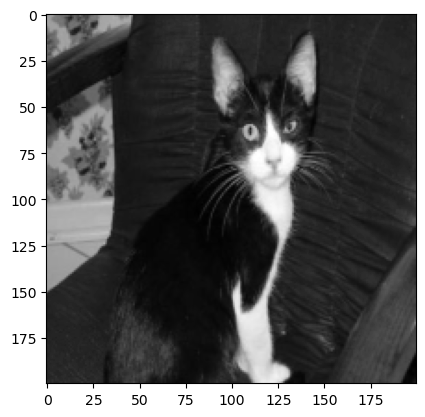

In [344]:
test_image = io.imread("./lab2_MLA_LSTM-main/test1 (1)/test1/luna.jpg")
# test_image = io.imread("../data/test/gato.jpg")
test_image = color.rgb2gray(test_image)
test_image = resize(test_image, (200, 200), anti_aliasing = True)
plt.imshow(test_image, cmap = "gray")
plt.show()
test_image = np.array([test_image])

In [345]:
cnn_model.predict(test_image)

1/1 [==============================] - 0s 94ms/step


array([[0.4664661]], dtype=float32)

## Modelo 2
#### El Modelo 2 se compone de:

    - Capa de entrada de convulución con 32 filtros de 2x2, padding same y activación relu.
    - Capa de Pooling de valor máximo con kernel de 2x2
    - Capa de Dropout de un 30%.
    - Capa de entrada de convulución con 64 filtros y activación relu.
    - Capa de Pooling de valor máximo con kernel de 2x2
    - Capa de Dropout de un 30%.
    - Capa de entrada de convulución con 128 flitros y activación relu.
    - Capa de Pooling de valor máximo con kernel de 2x2
    - Capa de Dropout de un 30%.
    - Capa de entrada de convulución con 128 neuronas y activación relu.
    - Capa de Pooling de valor máximo con kernel de 2x2
    - Capa de Dropout de un 30%.
    - Capa Flatten para "aplanar" resultado.
    - Capa de salida con 1 neurona y activación softmax.
    - Función de pérdida: Binary Cross-Entropy.
    - Optimizador rmsprop

In [346]:
cnn_model_2 = tf.keras.Sequential()
cnn_model_2.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu", input_shape = (200, 200, 1)))
cnn_model_2.add(MaxPooling2D(pool_size = 2))
cnn_model_2.add(Dropout(0.3))

cnn_model_2.add(Conv2D(filters = 64, kernel_size = 2, padding = "same", activation = "relu"))
cnn_model_2.add(MaxPooling2D(pool_size = 2))
cnn_model_2.add(Dropout(0.3))

cnn_model_2.add(Conv2D(filters = 128, kernel_size = 2, padding = "same", activation = "relu"))
cnn_model_2.add(MaxPooling2D(pool_size = 2))
cnn_model_2.add(Dropout(0.3))

cnn_model_2.add(Conv2D(filters = 128, kernel_size = 2, padding = "same", activation = "relu"))
cnn_model_2.add(MaxPooling2D(pool_size = 2))
cnn_model_2.add(Dropout(0.3))

cnn_model_2.add(Flatten())
cnn_model_2.add(Dense(512, activation = "relu"))
cnn_model_2.add(Dropout(0.5))
cnn_model_2.add(Dense(1, activation = "softmax"))
cnn_model_2.summary()

Model: "sequential_66"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_122 (Conv2D)         (None, 200, 200, 32)      160       
                                                                 
 max_pooling2d_122 (MaxPooli  (None, 100, 100, 32)     0         
 ng2D)                                                           
                                                                 
 dropout_173 (Dropout)       (None, 100, 100, 32)      0         
                                                                 
 conv2d_123 (Conv2D)         (None, 100, 100, 64)      8256      
                                                                 
 max_pooling2d_123 (MaxPooli  (None, 50, 50, 64)       0         
 ng2D)                                                           
                                                                 
 dropout_174 (Dropout)       (None, 50, 50, 64)      

In [347]:
cnn_model_2.compile(loss = "binary_crossentropy", optimizer = "rmsprop", metrics = ["accuracy"])

In [348]:
cnn_model_2.fit(X_train, y_train, batch_size = 20, epochs = 10, validation_split = 0.2)

Epoch 1/10
7/7 [==============================] - 6s 552ms/step - loss: 2.0321 - accuracy: 0.4688 - val_loss: 0.6936 - val_accuracy: 0.5938
Epoch 2/10
7/7 [==============================] - 3s 471ms/step - loss: 0.6989 - accuracy: 0.4688 - val_loss: 0.6957 - val_accuracy: 0.5938
Epoch 3/10
7/7 [==============================] - 3s 434ms/step - loss: 0.7040 - accuracy: 0.4688 - val_loss: 0.6957 - val_accuracy: 0.5938
Epoch 4/10
7/7 [==============================] - 3s 468ms/step - loss: 0.6935 - accuracy: 0.4688 - val_loss: 0.6956 - val_accuracy: 0.5938
Epoch 5/10
7/7 [==============================] - 3s 462ms/step - loss: 0.6960 - accuracy: 0.4688 - val_loss: 0.6970 - val_accuracy: 0.5938
Epoch 6/10
7/7 [==============================] - 3s 475ms/step - loss: 0.6933 - accuracy: 0.4688 - val_loss: 0.6969 - val_accuracy: 0.5938
Epoch 7/10
7/7 [==============================] - 3s 437ms/step - loss: 0.6946 - accuracy: 0.4688 - val_loss: 0.6978 - val_accuracy: 0.5938
Epoch 8/10
7/7 [====

In [349]:
cnn_model_2.evaluate(X_test, y_test)

2/2 [==============================] - 0s 42ms/step - loss: 0.6985 - accuracy: 0.5250


[0.6985219120979309, 0.5249999761581421]

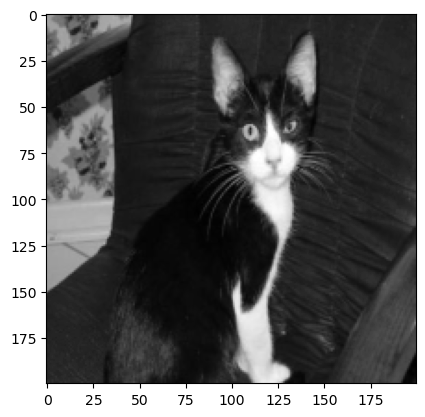

In [350]:
test_image = io.imread("./lab2_MLA_LSTM-main/test1 (1)/test1/luna.jpg")
# test_image = io.imread("../data/test/gato.jpg")
test_image = color.rgb2gray(test_image)
test_image = resize(test_image, (200, 200), anti_aliasing = True)
plt.imshow(test_image, cmap = "gray")
plt.show()
test_image = np.array([test_image])

In [351]:
cnn_model_2.predict(test_image)

1/1 [==============================] - 0s 161ms/step


array([[1.]], dtype=float32)

### Red Neuronal LSTM

In [352]:
lstm_model = tf.keras.Sequential()
lstm_model.add(LSTM(64, input_shape = (200, 200)))
lstm_model.add(Dense(1))

In [353]:
lstm_model.summary()

Model: "sequential_67"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_19 (LSTM)              (None, 64)                67840     
                                                                 
 dense_135 (Dense)           (None, 1)                 65        
                                                                 
Total params: 67,905
Trainable params: 67,905
Non-trainable params: 0
_________________________________________________________________


In [354]:
lstm_model.compile(loss = "binary_crossentropy", optimizer = "rmsprop", metrics = ["accuracy"])

In [355]:
lstm_model.fit(X_train, y_train, batch_size = 20, epochs = 2, validation_split = 0.2)

Epoch 1/2
7/7 [==============================] - 5s 275ms/step - loss: 2.4582 - accuracy: 0.5391 - val_loss: 8.7780 - val_accuracy: 0.4062
Epoch 2/2
7/7 [==============================] - 1s 155ms/step - loss: 7.2314 - accuracy: 0.5312 - val_loss: 8.7837 - val_accuracy: 0.4062


In [356]:
lstm_model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 28ms/step - loss: 8.0981 - accuracy: 0.4750


[8.098097801208496, 0.4749999940395355]

### Modelo 2: LSTM

In [357]:
model_single_lstm = tf.keras.Sequential()
model_single_lstm.add(LSTM(64, input_shape = (200, 200)))
model_single_lstm.add(Dense(128, activation='relu'))
model_single_lstm.add(Dense(1, activation='sigmoid'))

model_single_lstm.summary()

Model: "sequential_68"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_20 (LSTM)              (None, 64)                67840     
                                                                 
 dense_136 (Dense)           (None, 128)               8320      
                                                                 
 dense_137 (Dense)           (None, 1)                 129       
                                                                 
Total params: 76,289
Trainable params: 76,289
Non-trainable params: 0
_________________________________________________________________


In [358]:
model_single_lstm.compile(optimizer = Adam(),  loss = 'binary_crossentropy',   metrics = 'accuracy')

In [359]:
model_single_lstm.fit(X_train, y_train, batch_size = 20, epochs = 2, validation_split = 0.2)

Epoch 1/2
7/7 [==============================] - 6s 402ms/step - loss: 0.6981 - accuracy: 0.5078 - val_loss: 0.6702 - val_accuracy: 0.6562
Epoch 2/2
7/7 [==============================] - 1s 124ms/step - loss: 0.6778 - accuracy: 0.5938 - val_loss: 0.7006 - val_accuracy: 0.5000


In [360]:
model_single_lstm.evaluate(X_test, y_test)

2/2 [==============================] - 0s 30ms/step - loss: 0.7259 - accuracy: 0.4250


[0.725875973701477, 0.42500001192092896]

## Audio